In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [7, 7]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,array, arange

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

The **directional derivative** of a differentiable function $f$ in the direction of unit vector $\vec u$ at $\vec x$ is
$$D_{\vec u} f(\vec x) = \lim_{h\to 0}\frac{f(\vec x+h\vec u) - f(\vec x)}{h} = \nabla f(\vec x)\cdot\vec u.$$

3 important properties:
  - $\nabla f$ is orthogonal to level sets.
  - $\nabla f$ points in the direction of greatest change.
  - $|\nabla f|$ is the amount of greatest change.

<p style="padding-bottom:40%;"> </p>

# Lecture 12

  - Objectives
    - Define local minima/maxima.
    - Classify critical points using the second derivative test.
    - Solve unconstrained optimization problems
    
  - Resources
    - Content
      - Stewart: §14.7
      - New Strang: [§4.7](https://openstax.org/books/calculus-volume-3/pages/4-7-maxima-minima-problems)

    - Practice
      - Mooculus: [Minima and Maxima](https://ximera.osu.edu/mooculus/calculus3/maximumsAndMinimumsOfFunctionsOfSeveralVariables/digInMaximaAndMinima)
    - Extras
      - CalcBLUE: [Critical Points](https://youtu.be/J1HS6hmBtC0) 

# Warm-up

<strike>Stand up if you are as tall or taller than all the people sitting one seat away from you. </strike>



<p style="padding-bottom:40%;"> </p>

## Definitions

A **local maximum** (resp. **minimum**) of a function occurs at a point with position $\vec x_0$ if there is a radius $r>0$ such that for all $\vec y$ where $|\vec x_0 - \vec y| < r$ $$f(\vec x_0) \geq f(\vec y)$$ 

$$({\rm resp. }f(\vec x_0) \leq f(\vec y)).$$

A **global maximum** (resp. **minimum**) of a function occurs at a point with position $\vec x_0$ if for all $\vec y$ in the domain of $f$. 

$$f(\vec x_0) \geq f(\vec y)$$ 

$$({\rm resp. }f(\vec x_0) \leq f(\vec y)).$$

<p style="padding-bottom:40%;"> </p>

![Local pizza max](https://images.squarespace-cdn.com/content/5a451092c027d82d5c32ce60/1514907511830-4JHEGBXRD4D7SX2HG0V1/BestPizzaOnTheBlock.jpg?content-type=image%2Fjpeg)

Note: The local maximum/minimum is actually the _output_ value $f(\vec x_0)$, a scalar, not the location at which it occurs. 

A **critical point** $\vec x$ of a function $f$ is a point in the domain at which the function is not differentiable or $\nabla f(\vec x) = \vec 0$.

<p style="padding-bottom:40%;"> </p>

## Three Surfaces

At the critical point $(0,0)$, the function given by 

  - $1 - x^2 - y^2$ has a local maximum.
  - $x^2 + y^2$ has a local minimum.
  - $y^2 - x^2$ has a **saddle point** (critical point at which $f$ does not have a local min or max).

In [3]:
f = lambda x,y: 1-y**2-x**2
g = lambda x,y: y**2+x**2
h = lambda x,y: y**2-x**2

@interact
def _(func={"max": f,"min":g,"saddle":h},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx =yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)


interactive(children=(Dropdown(description='func', options={'max': <function <lambda> at 0x130084a60>, 'min': …

### Examples

For each plot below, sketch the gradient field, identify critical points, and mark them as having a local max, local min, or neither. 

In [4]:
f = lambda x,y: 20*exp(-(x**2 + y**2)) - 15* exp(-2 *((x - 1)**2 + (y - 3/4)**2)) - 18 *exp(-2 *((x - 1)**2 + (y + 1/2)**2))
g = lambda x,y: 10*x**2
h = lambda x,y: 20*((x - 1)**2 - y**2/2) 
k = lambda x,y: 20*exp(-1/2*((x - 1/4)**2 + (y + 1/3)**2))*sin(5*x)*cos(7*y)

@interact
def _(func={"f": f,"g":g,"h":h,"k":k},angle=(-170,0,6),vangle=(0,90,6),grad=False,surf=False,):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(122,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    if surf:
        ax.plot_surface(X,Y,Z,alpha=.9,cmap='ocean',rcount=70,ccount=70);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(121)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx =yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    if grad: 
        ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)


interactive(children=(Dropdown(description='func', options={'f': <function <lambda> at 0x13025fb80>, 'g': <fun…

<p style="padding-bottom:40%;"> </p>

## Exercise

Find all critical points of the function below.

$$f(x,y) = x^4+y^4-4x y+1$$

<p style="padding-bottom:40%;"> </p>

## Recall

In one-variable calculus, how did one determine if a critical point held a local min, local max or neither?

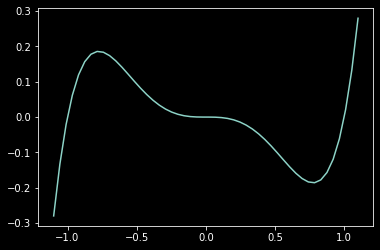

In [5]:
x = np.linspace(-1.1,1.1)
plt.plot([-1.1,1.1],[0,0],'k')
plt.plot(x,x**5-x**3);

<p style="padding-bottom:40%;"> </p>

## The Second Derivative Test

If all 2nd order partials of $f(x,y)$ are continuous in the neighborhood of a critical point $(a,b)$, then let 
$$ D = f_{xx}(a,b)f_{yy}(a,b) - (f_{xy}(a,b))^2  = 
\begin{vmatrix} 
\frac{\partial ^2 f}{\partial x^2} & \frac{\partial ^2 f}{\partial y \partial x} \\
\frac{\partial ^2 f}{\partial x \partial y} & \frac{\partial ^2 f}{\partial y^2} 
\end{vmatrix}$$

Then, 
  - if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.
  - if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.
  - if $D<0$, $(a,b)$ is a saddle point. 

Otherwise, the test is inconclusive.

<p style="padding-bottom:40%;"> </p>

## How does it work?

Consider the "concavity" of the function along the "line with slope $m$": $$\vec r(t) = \langle t, m t\rangle.$$

Compute $\frac{d^2}{dt^2}f \circ r(t)$. 

In [6]:
f = lambda x,y: 1-y**2-x**2
g = lambda x,y: y**2+x**2
h = lambda x,y: y**2-x**2

@interact
def _(func={"max": f,"min":g,"saddle":h},angle=(-170,0,6),vangle=(0,90,6),m=(-2.01234,2.12)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean',rcount=50,ccount=50);
    tsize = min(1.5,np.abs(1.5/m))
    t = np.linspace(-tsize,tsize,20)
    ax.plot(t,m*t,func(t,m*t),lw=3,color='r')
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(122)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 12)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    xx =yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)
    ax2.plot(t,m*t,lw=3,color='r')



interactive(children=(Dropdown(description='func', options={'max': <function <lambda> at 0x1307491f0>, 'min': …

<p style="padding-bottom:40%;"> </p>

## Exercise

Use the second derivative test to classify the critical points $(-1,-1)$,$(0,0)$, and $(1,1)$ in the example above.

$$f(x,y) = x^4+y^4-4x y+1$$

In [7]:
f = lambda x,y: x**4+y**4-4*x *y+1

@interact
def _(func=fixed(f),angle=(-170,0,6),vangle=(0,90,6),grad=False,surf=False,):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(122,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-3/2,3/2,601)
    y =  np.linspace(-3/2,3/2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    if surf:
        ax.plot_surface(X,Y,Z,alpha=.9,cmap='ocean',rcount=70,ccount=70);
#     ax.quiver([1,1],[0,0],[0,0],[-2/exp(1),-1/sqrt(2)],[1/exp(1),1/sqrt(2)],[0,0],lw=3,color='r',alpha=1)
    ax2 = fig.add_subplot(121)
    cp = ax2.contour(X,Y,Z,cmap='ocean',levels = 25)
    ax2.set_xlabel("$x$",size=16)
    ax2.set_ylabel("$y$",size=16)
    ax2.clabel(cp,fmt="%.1f")
    ax.set_zlim3d([-1,6])
    xx =yy = np.linspace(-3/2,3/2,20)
    xx,yy = np.meshgrid(xx,yy)
    if grad: 
        ax2.quiver(xx,yy,func(xx+.01,yy)-func(xx,yy),func(xx,yy+.01)-func(xx,yy),lw=3,alpha=1)


interactive(children=(IntSlider(value=-86, description='angle', max=0, min=-170, step=6), IntSlider(value=42, …

<p style="padding-bottom:40%;"> </p>

# A (very) little topology

Let $S$ be a set in $\RR^n$ and $\vec p$ be the position of a point in it.  (We can be lazy and say $\vec p \in S$.)

$\vec p$ is an **interior point** of $S$ if there exists a positive radius $r>0$ such that for all $|\vec y - \vec p| < r$, $\vec y \in S$.

$\vec p$ is a **boundary point** of $S$ if for every $r>0$, there are points $\vec y_1$ and $\vec y_2$ with $|\vec y_i - \vec p| < r$ such that $\vec y_1 \in S$ and $\vec y_2 \notin S$.

<p style="padding-bottom:40%;"> </p>

#### Quick Example

Let $S\subset \RR^2$ be the unit disk. $\left(1/2,\sqrt{3}/2\right)$ is a boundary point. $(1/2,1/2)$ is an interior point.

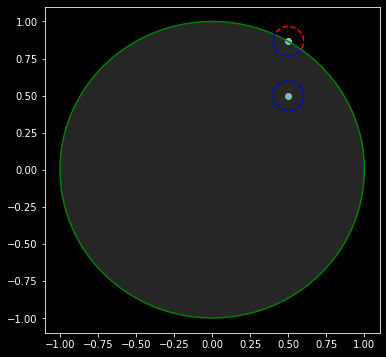

In [12]:
t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(6,6))
plt.scatter((1/2,1/2),(1/2,sqrt(3)/2))
plt.fill(cos(t),sin(t),'gray',alpha=.3)
plt.plot(cos(t),sin(t),'-g',1/10*cos(t)+1/2,1/10*sin(t)+1/2,'--b')
t=np.linspace(-pi/6,5*pi/6,50)
plt.plot(1/10*cos(t)+1/2,1/10*sin(t)+sqrt(3)/2,'--r',-1/10*cos(t)+1/2,-1/10*sin(t)+sqrt(3)/2,'--b');

<p style="padding-bottom:40%;"> </p>

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

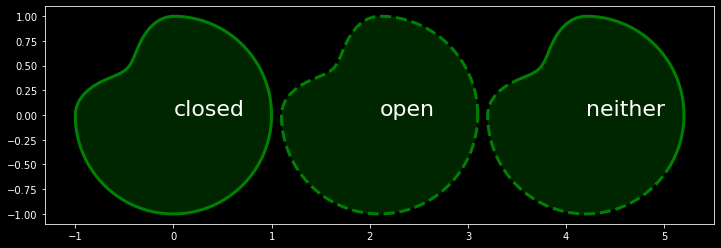

In [14]:
def rr(t):
    if pi/2 < t < pi:
        return 2/3+1/3*cos(2*t)**2
    else:
        return 1.

rr = np.vectorize(rr)

t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(12,4))
plt.fill(rr(t)*cos(t),rr(t)*sin(t),'g',alpha=.3)
plt.plot(rr(t)*cos(t),rr(t)*sin(t),'-g',2.1+rr(t)*cos(t),rr(t)*sin(t),'--g',lw=3)
plt.fill(rr(t)*cos(t)+2.1,rr(t)*sin(t),'g',alpha=.3)
plt.fill(rr(t)*cos(t)+2*2.1,rr(t)*sin(t),'g',alpha=.3)
t=np.linspace(-pi/6,5*pi/6,50)
plt.plot(4.2+rr(t)*cos(t),rr(t)*sin(t),'-g',4.2+rr(t+pi)*cos(t+pi),rr(t+pi)*sin(t+pi),'--g',lw=3);
plt.text(2.1,0,"open",fontsize=22);
plt.text(4.2,0,"neither",fontsize=22);
plt.text(0,0,"closed",fontsize=22);

<p style="padding-bottom:40%;"> </p>

# Optimization


### Theorem (Fermat, I guess)

If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. 

### Extreme Value Theorem

If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the **global maximum**. That is, $f(\vec y) \leq f(\vec x)$.  

The same holds for the global minimum, mutatis mutandis. 

In [15]:
@interact
def _(angle=(-126,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca(projection='3d')
    th = linspace(0,2*pi,100)
    r = linspace(0,1,100)
    r,th = meshgrid(r,th)
    X = 3/2*r * rr(th-pi/2) *cos(th) + 1/2
    Y = 3/2*r * rr(th-pi/2) *sin(th)
    Z = X**4 + Y**4 - 4*X*Y - 1
    ax.plot_surface(X,Y,0*Z - 1,color='gray',alpha=.3)
    ax.plot_surface(X,Y,Z/4,cmap='ocean')
    ax.contour(X,Y,Z/4,offset=-1,levels=32,cmap='ocean')
    ax.set_zlim(-1,4)
    ax.view_init(vangle,angle)

interactive(children=(IntSlider(value=-6, description='angle', max=120, min=-126, step=6), IntSlider(value=42,…

<p style="padding-bottom:40%;"> </p>

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$ (next time).

## Exercise

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

In [ ]:
@interact
def _(angle=(-120,30,6)):
    fig= plt.figure(figsize=(8,8),dpi=100)
    ax = fig.add_subplot(projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    ax.view_init(30,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');